In [57]:
!gdown 1ElkerAvbBP4I-nXu_wY3_Jfce17KHyFG

Downloading...
From: https://drive.google.com/uc?id=1ElkerAvbBP4I-nXu_wY3_Jfce17KHyFG
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 110MB/s] 


In [58]:
import pandas as pd
df= pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Before further data exploration, the preliminary step is to check if data is complete and has all the required details. Here, we check basic features of data frame using info() method,


*   Total features - 10
*   Data count - 550068
*   No of numerical columns - 5
*   No of categorical columns - 5

Sufficient details are present for the next stage of data analysis. Non-Null count column does not indicate any features having null values. We validated the same by using the isna() function. The function sums the count of null values in each column. The result is 0 for all the columns

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [60]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**Expand on Marital Status Column:**
The column describing the marital status of the customer uses numerical values for data. For clarity, let's convert it to actual marital status,


*   0: Single
*   1: Married




In [61]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda row: 'Single' if row==0 else 'Married')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Single,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Single,20,365


**Missing value and Outlier detection and treatment.**

---


Along with checking for null values, we should also detect any outlier values present in different columns in data. Depending on the column and how many outliers are present, we might or might not need to fix for outliers.

Here, for detecting outliers, we use a simple visualization technique called boxplot. The boxplot gives descriptive information on a column including the mean, median, 25 percentile, 50 percentile and 75 percentile. Along with this, It also plots the outliers(if any) on the positive and negative side

For our data, we will plot boxplots for the only valid numerical column(Purchase) in terms of Marital Status, Gender and Age. The other 3 numerical columns are actually categorical columns using numerical values

* In the box plots, Purchase amount > 22000(approx) are detected as outliers
* Since Walmart sells products of different price range from low to very high, outliers in purchase amount do not indicate any aberrations
* Ouliers do not impact our analysis and are explained by known consumer behavior. So, there is no treatment required for these values









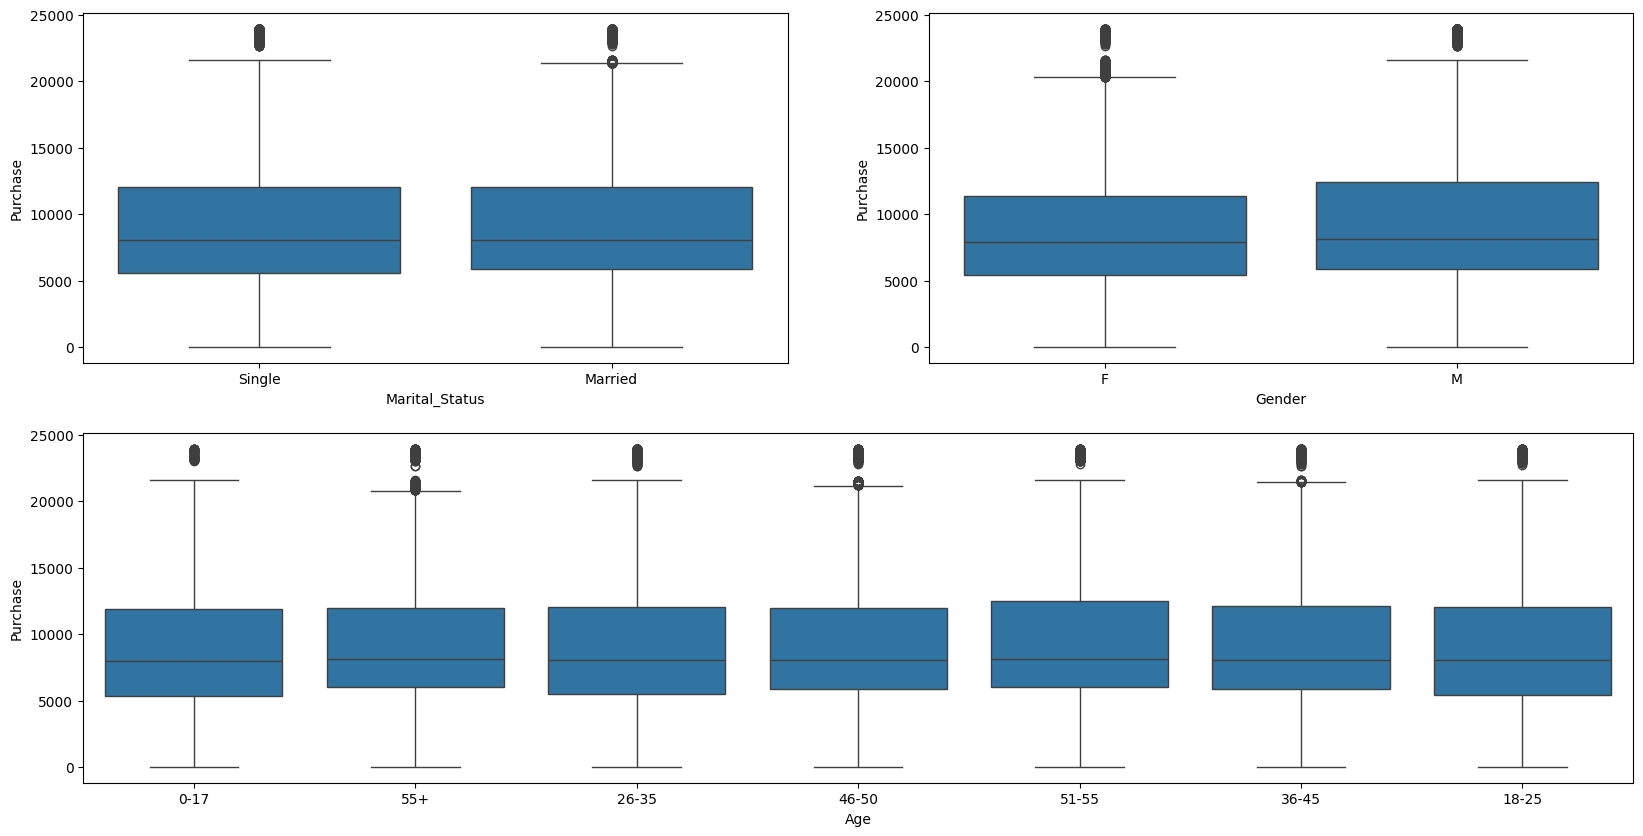

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(x='Marital_Status', y='Purchase', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Gender', y='Purchase', data=df)

plt.subplot(2,1,2)
sns.boxplot(x='Age', y='Purchase', data=df)
plt.show()

**Statistical Summary of Purchase Amount:**
Since most of the analysis will be centered around Purchase amount, let's look into the statistical summary of this column,

Quick Observations
* Minimum purchase amount: 12
* Maximum purchase amount: 23961
* Mean: 9263

In [63]:
df['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**Non-Graphical Analysis**

Let's do analysis on a few features and derive insights from it


To start with,
1. Which product sold the most?
2. Which user bought the most?

In [64]:
df['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00314842,1
P00298842,1
P00231642,1


In [65]:
df['User_ID'].value_counts()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1002690,7
1002111,7
1005810,7


3. Among 5891 users, how many customers were Male, Female?

In [66]:
male_users = df.loc[df['Gender'] == 'M']['User_ID'].value_counts()
female_users = df.loc[df['Gender'] == 'F']['User_ID'].value_counts()
print("1. No of Male Users {}".format(len(male_users)))
print("2. No of Female Users {}".format(len(female_users)))

1. No of Male Users 4225
2. No of Female Users 1666


**Observations**
1. The product P00265242 is the best seller with 1880 total purchases
2. The user 1001680 had bought the most with 1026 total purchases
3. Also, it should be noted that there are 3631 unique products and 5891 unique buyers/customers
4. Among 5891 unique customers, 4225 are Male and 1666 are Female

**Visual Analysis**
Let's visually understand a few features and derive insights from it
1. Understand the gender wise split up of purchases

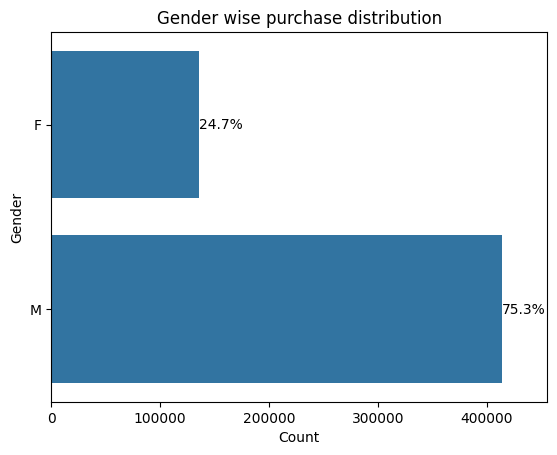

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(df['Gender'])
total = df['Gender'].count()

for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

ax.margins(x=0.1)

ax.set(xlabel='Count', ylabel='Gender', title='Gender wise purchase distribution')
plt.show()

**Observations**
1. Surprisingly, an overwhelming amount of purchases(75.3%) were from Male customers
2. Is this because Males served as proxy for Female purchases. i.e Females bought items and used their spouse/father for billing. This needs to be analysed further

In the section "Missing value and Outlier detection and treatment", we used boxplots for purchase amount categorized for Age, Gender and Marital Status. The differences in purchase amounts were not statistically significant

Let's now draw boxplots for other categorical columns and see if it provides any insights

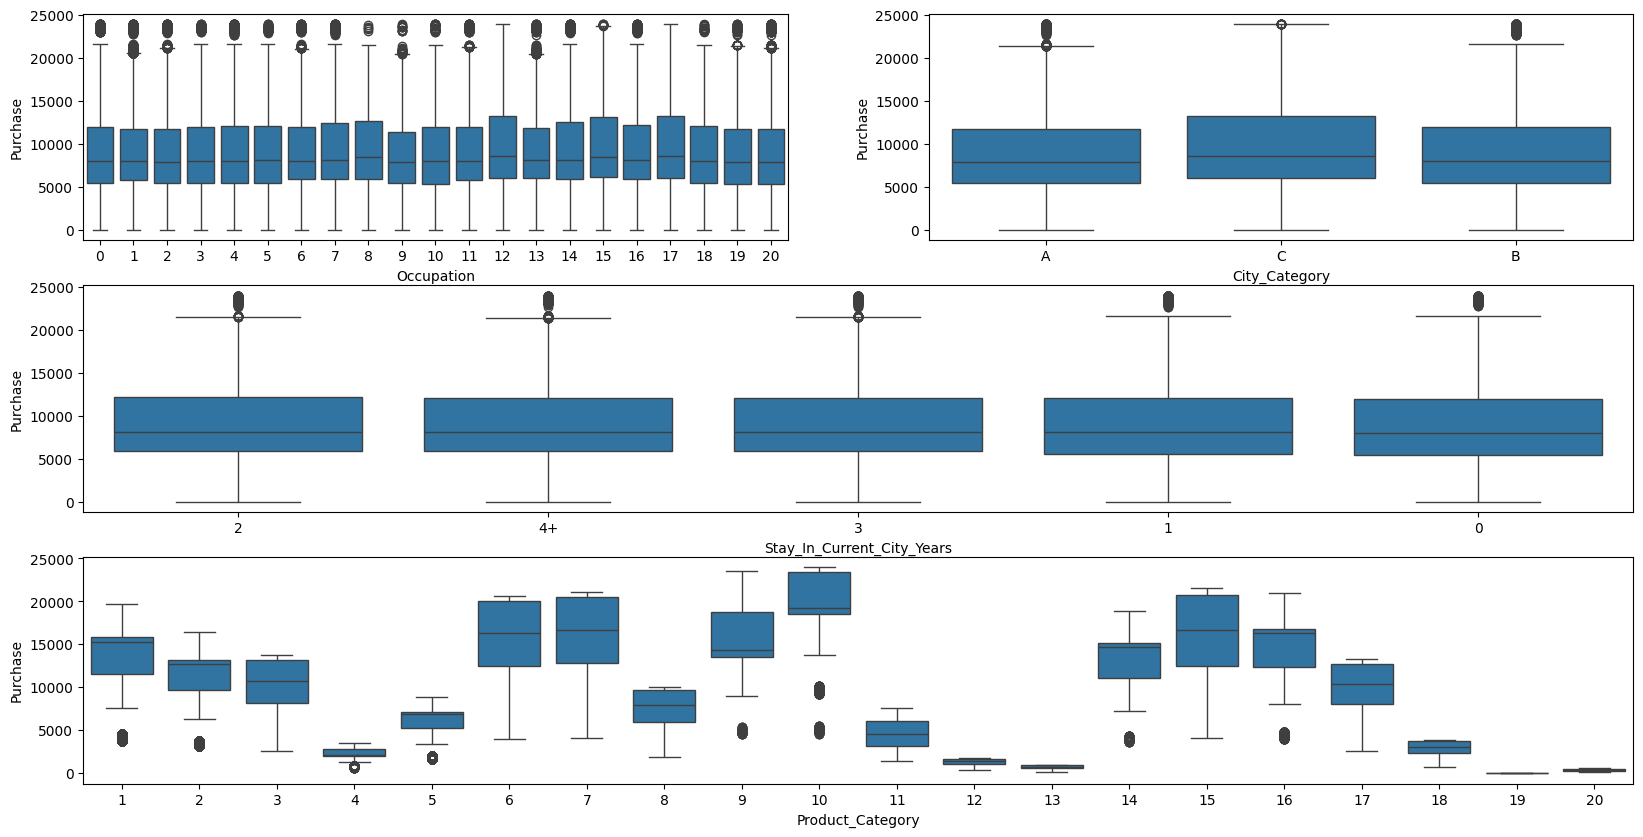

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
sns.boxplot(x='Occupation', y='Purchase', data=df)

plt.subplot(3,2,2)
sns.boxplot(x='City_Category', y='Purchase', data=df)

plt.subplot(3,1,2)
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)

plt.subplot(3,1,3)
sns.boxplot(x='Product_Category', y='Purchase', data=df)
plt.show()

**Observations**
1. Customers with occupation 12, 15 and 17 spend more on average than other occupations.
2. Customers from City C spend more on average when compared to City A or City B
3. Purchase amount does not correlate with number of years a customer had stayed in a city. It's the same regardless of how many years a customer had been in a city
4. Product Category 10 is the most expensive category with a median purchase value of 20000
5. Product Categories 6,7,15 and 16 are the second most expensive categories with median trending around 15000
6. Product Categories 13, 19 and 20 are the least expensive with median purchase amount of roughly <= 1000


**Anaysis based on Correlation**
* Let's check if there are any interesting correlation between features by using heatmap

In [69]:
import numpy as np

df_new = df[['Product_Category','Age','Purchase']]
df_heatmap = df_new.pivot_table(values='Purchase',index='Age',columns='Product_Category',aggfunc=np.mean)
df_heatmap

<ipython-input-69-8d6c530178d9>:4: FutureWarning: The provided callable <function mean at 0x7bc58e1f5000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_heatmap = df_new.pivot_table(values='Purchase',index='Age',columns='Product_Category',aggfunc=np.mean)


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,13607.600279,10851.982609,9431.505000,2244.659631,6249.356120,15982.842105,15490.830189,7632.767493,15434.875000,20038.495495,4808.166216,1423.712000,737.258929,13134.025641,15984.587500,14635.951965,10143.833333,2766.777778,38.491525,368.011111
18-25,13448.852904,10966.741870,9871.727601,2194.358912,6142.584040,15768.623900,16062.850312,7387.642287,17127.650794,19192.218905,4597.116163,1273.038724,701.903439,12704.517391,14358.240234,13993.362328,9476.487805,2909.808260,36.047273,367.253731
26-35,13456.256056,11083.914427,10154.785043,2340.182729,6176.736014,15758.713848,16341.205330,7400.653900,15673.753247,19560.216004,4677.053069,1322.249088,716.744752,12781.127660,14525.945616,14698.257649,9829.015748,3039.208253,36.836590,376.505568
36-45,13767.068287,11375.946254,10340.294240,2400.508496,6283.077612,15803.359323,16450.993820,7528.592033,14689.448598,19651.978138,4762.744195,1350.266600,719.819200,13523.483974,14966.862366,14968.702302,10111.229630,2948.787749,37.025000,364.104743
46-50,13778.098148,11479.071734,10261.654797,2420.013131,6372.036672,15916.663379,16619.957187,7532.639452,14759.393939,19654.736538,4742.285171,1383.450000,730.704174,13117.140940,14709.913621,15186.213879,10296.610526,2896.242165,37.053691,384.180617
51-55,14125.773014,11901.649635,10327.424242,2445.980826,6502.194885,16227.108276,16376.913534,7772.095824,14576.689655,20530.747592,4628.307270,1380.413395,762.842650,14161.207792,16021.627953,15629.892857,10538.009346,2964.732861,37.910448,361.800000
55+,14065.121741,12180.648619,10166.398357,2387.732704,6463.649339,16218.627610,16942.664179,7892.292043,18626.375000,19828.285714,4640.276292,1431.038235,738.362126,13563.560000,14759.820961,15290.127321,10600.805970,2993.800830,38.893204,359.100000


Plotting this as heatmap

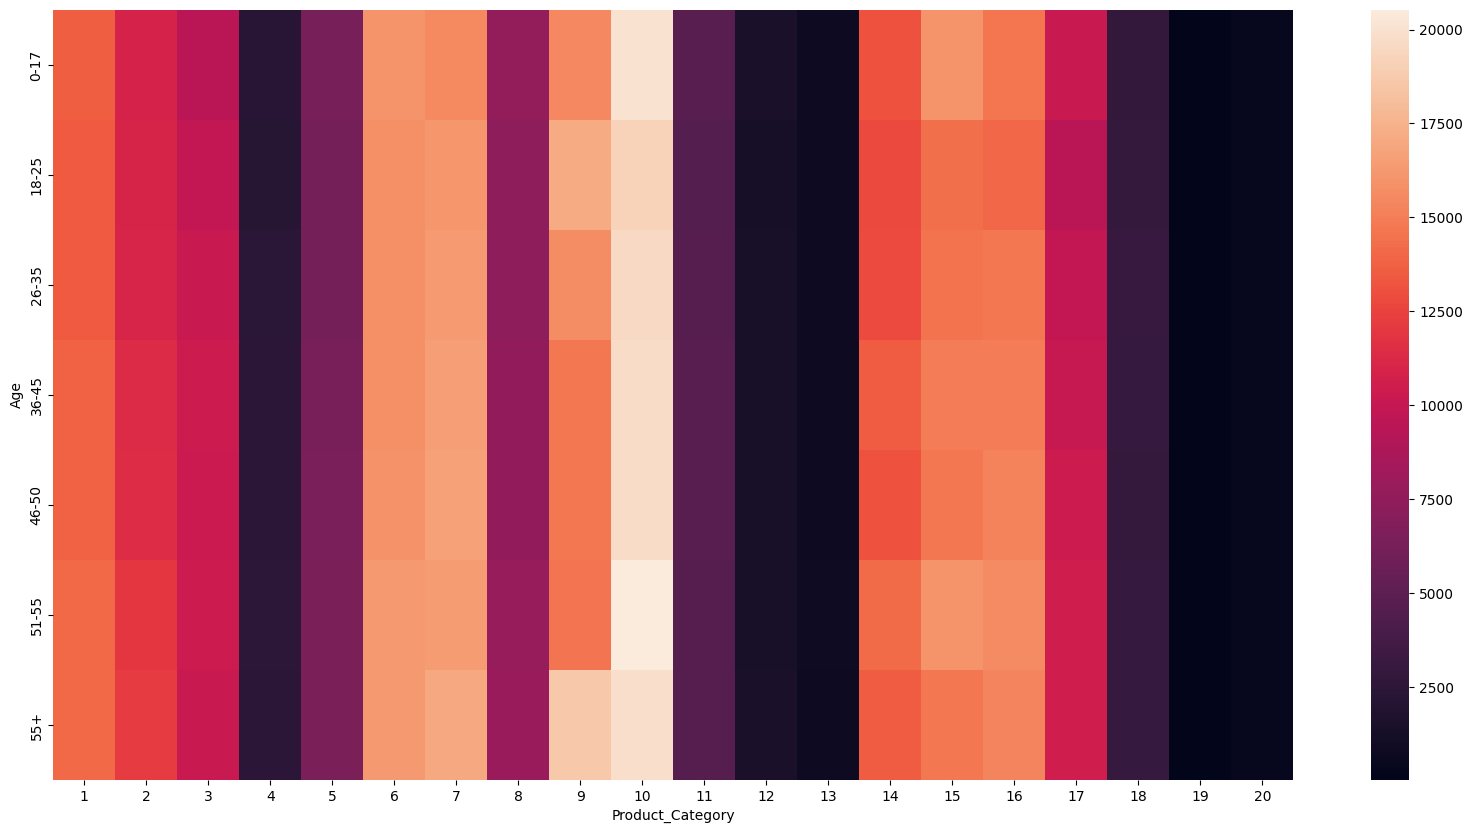

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_heatmap)
plt.show()

**Observations**
1. The heatmap correlates with our understanding of expensive and less expensive products. For example, Categories 12, 13, 19, 20 are least expensive
2. In relation with Different age groups, it's observed that 55+ customers buy the more expensive items from product category 9.
3. Product category 10 is the most expensive. Among the customers buying from this category, 51 to 55 age group buys the top of the line products in this category

**Data Analysis 1**

1. Are women spending more money per transaction than men? Why or Why not?

In [71]:
import numpy as np

#Get all Purchases from Male and Female Customers
female_customers = df.loc[df['Gender'] == 'F']
male_customers = df.loc[df['Gender'] == 'M']

male_purchase_mean = np.mean(male_customers['Purchase'])
female_purchase_mean = np.mean(female_customers['Purchase'])
print("1. Male average spending per transaction: {}".format(round(male_purchase_mean)))
print("2. Female average spending per transaction: {}".format(round(female_purchase_mean)))

1. Male average spending per transaction: 9438
2. Female average spending per transaction: 8735


**Observations**
1. It was noted that Men spent more per transaction than Women

**Distribution of mean of expenses - Male & Female**

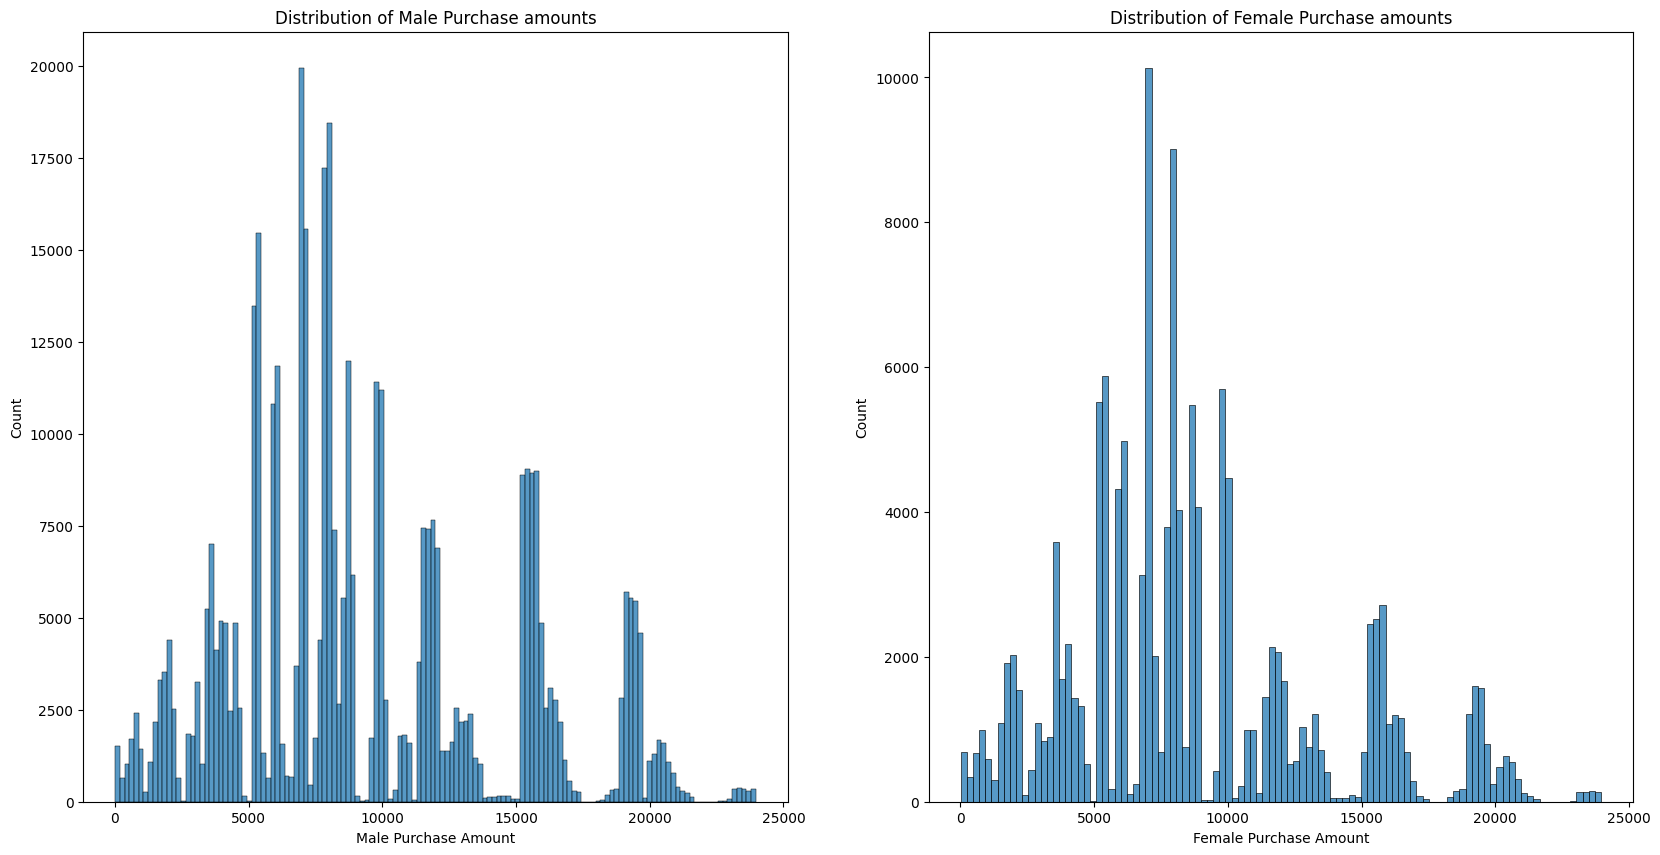

In [72]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(male_customers['Purchase']).set(title="Distribution of Male Purchase amounts", xlabel='Male Purchase Amount', ylabel='Count')

plt.subplot(1,2,2)
sns.histplot(female_customers['Purchase']).set(title="Distribution of Female Purchase amounts", xlabel='Female Purchase Amount', ylabel='Count')

plt.show()

Let's visualize the distribution using the kernel density estimate(KDE) plot. The distribution will be overlapped to help us understand the distribution for different purchase amounts

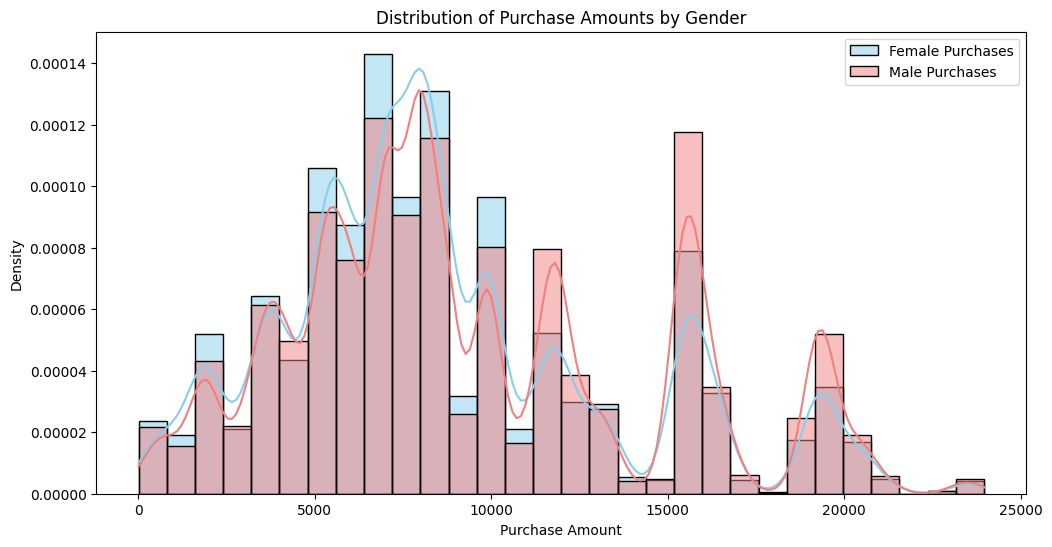

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms and KDE for male and female purchase distributions
plt.figure(figsize=(12, 6))

# Plot female purchases
sns.histplot(female_customers['Purchase'], kde=True, color='skyblue', label='Female Purchases', stat='density', bins=30)

# Plot male purchases
sns.histplot(male_customers['Purchase'], kde=True, color='lightcoral', label='Male Purchases', stat='density', bins=30)

plt.title('Distribution of Purchase Amounts by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

**Confidence Intervals**

Both Male and Female purchase amounts follow normal distribution. Let's use this finding to compute the confidence interval with significance level of 0.05 and confidence level of 0.95

In [74]:
import numpy as np
import math
from scipy.stats import norm

male_pur_mean = np.mean(male_customers['Purchase'])
male_pur_std = np.std(male_customers['Purchase'])
male_se = male_pur_std/math.sqrt(len(male_customers))
male_cl_left = norm.ppf(0.025) * male_se + male_pur_mean
male_cl_right = norm.ppf(0.975) * male_se + male_pur_mean
print("With 95% confidence, the male spending lies in the range of {} to {}".format(round(male_cl_left,2), round(male_cl_right,2)))

female_pur_mean = np.mean(female_customers['Purchase'])
female_pur_std = np.std(female_customers['Purchase'])
female_se = female_pur_std/math.sqrt(len(female_customers))
female_cl_left = norm.ppf(0.025) * female_se + female_pur_mean
female_cl_right = norm.ppf(0.975) * female_se + female_pur_mean
print("With 95% confidence, the female spending lies in the range of {} to {}".format(round(female_cl_left,2), round(female_cl_right,2)))

With 95% confidence, the male spending lies in the range of 9422.02 to 9453.03
With 95% confidence, the female spending lies in the range of 8709.21 to 8759.92


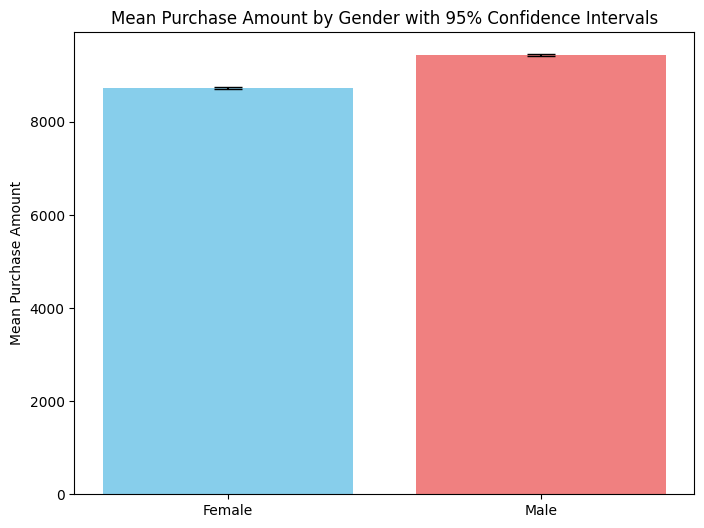

In [75]:
# Plot mean with confidence intervals
means = [female_pur_mean, male_pur_mean]
errors = [female_pur_mean - female_cl_left, male_pur_mean - male_cl_left]

plt.figure(figsize=(8, 6))
plt.bar(['Female', 'Male'], means, yerr=errors, capsize=10, color=['skyblue', 'lightcoral'])
plt.ylabel('Mean Purchase Amount')
plt.title('Mean Purchase Amount by Gender with 95% Confidence Intervals')
plt.show()

Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

**Observations**
1. From the above analysis, we can conclude that the confidence intervals for male and female spending do not overlap
2. This indicates a significant difference in spending patterns between male and female customers. In other words, we can conclude with high confidence that male customers spent more on average than female customers
3. Since Male customers spend more, Walmart can target Males with marketing campaigns for products with higher value
4. For female customers, looks like the instinct is to spend less. These customers should be targeted with discounts, vouchers and special sale days.
5. The KDE plot shows the purchase ranges where women spent more on average than men. The related products should be identified and campaigns run around them.
6. The conclusion can be used to enhance the loyalty program. Based on the gender, the rewards or cashback can be adjusted


**Data Analysis 2**

1. Are married customers spending more money per transaction than Single customers? Why or Why not?

In [76]:
import numpy as np

#Get all Purchases from Single and Married Customers
single_customers = df.loc[df['Marital_Status'] == 'Single']
married_customers = df.loc[df['Marital_Status'] == 'Married']

single_purchase_mean = np.mean(single_customers['Purchase'])
married_purchase_mean = np.mean(married_customers['Purchase'])
print("1. Single customers average spending per transaction: {}".format(round(single_purchase_mean)))
print("2. Married customers average spending per transaction: {}".format(round(married_purchase_mean)))

1. Single customers average spending per transaction: 9266
2. Married customers average spending per transaction: 9261


**Observations**
1. There is no statistically significant difference on spending between Single and Married customers

**Distribution of mean of expenses - Single and Married**

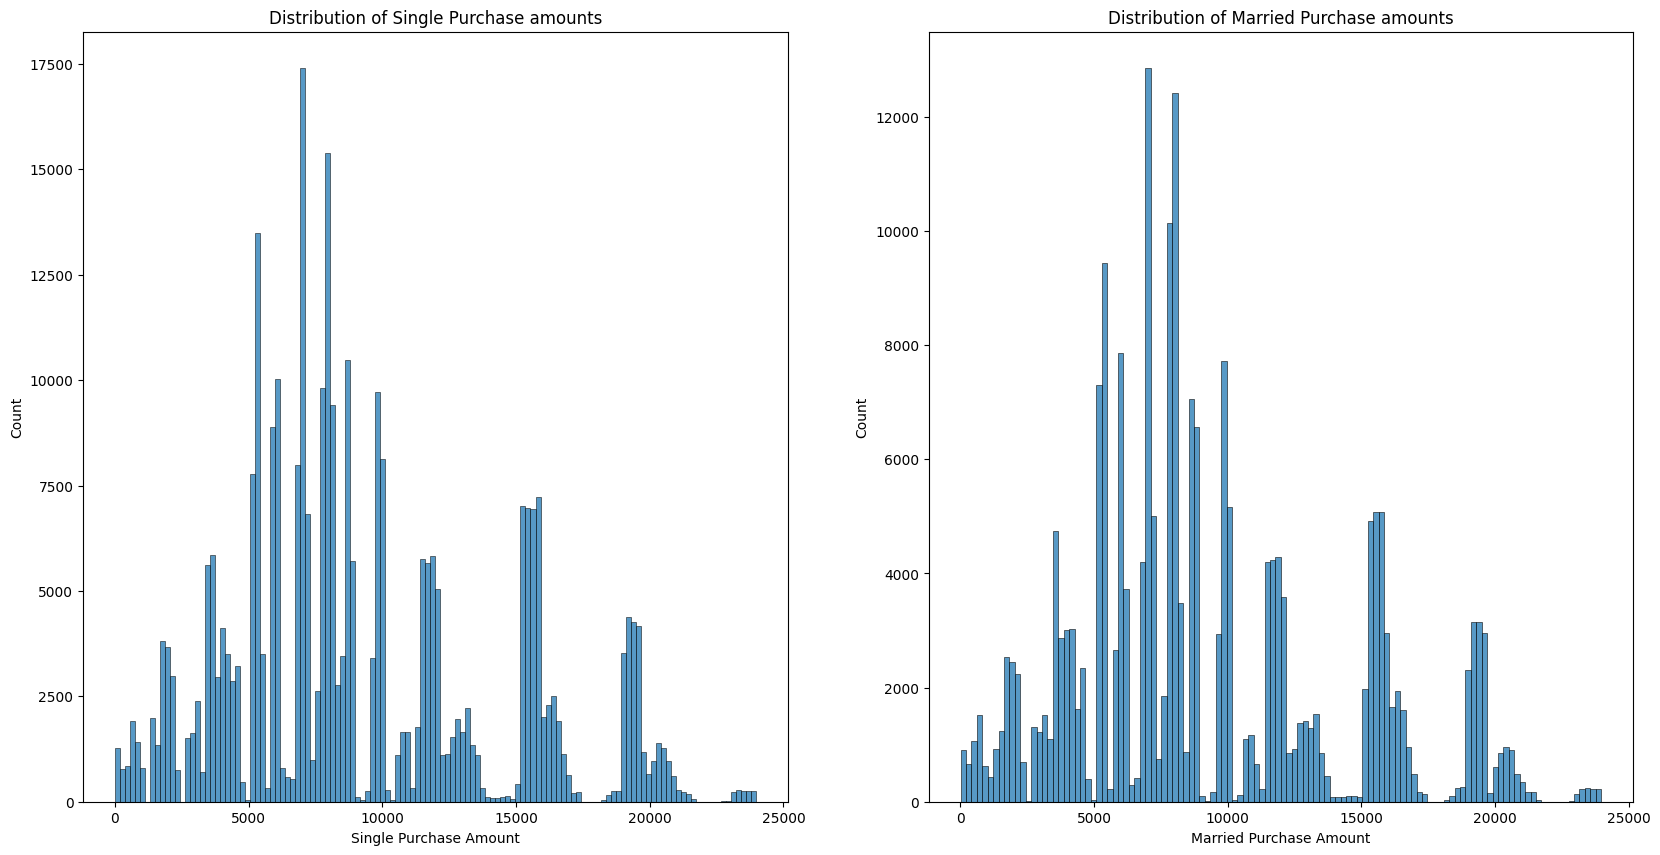

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(single_customers['Purchase']).set(title="Distribution of Single Purchase amounts", xlabel='Single Purchase Amount', ylabel='Count')

plt.subplot(1,2,2)
sns.histplot(married_customers['Purchase']).set(title="Distribution of Married Purchase amounts", xlabel='Married Purchase Amount', ylabel='Count')

plt.show()

Let's visualize the distribution using the kernel density estimate(KDE) plot. The distribution will be overlapped to help us understand the distribution for different purchase amounts

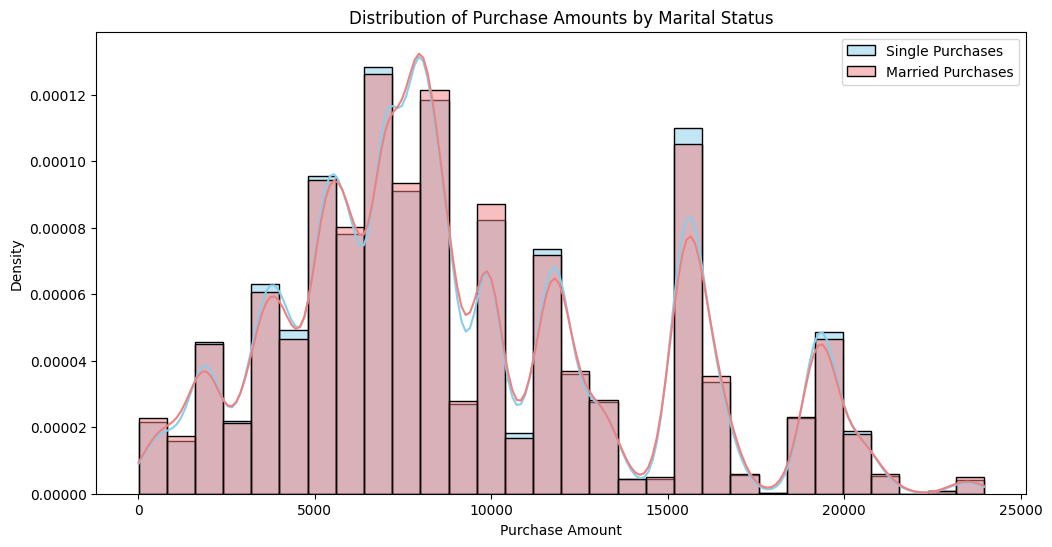

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms and KDE for single and married purchase distributions
plt.figure(figsize=(12, 6))

# Plot single purchases
sns.histplot(single_customers['Purchase'], kde=True, color='skyblue', label='Single Purchases', stat='density', bins=30)

# Plot married purchases
sns.histplot(married_customers['Purchase'], kde=True, color='lightcoral', label='Married Purchases', stat='density', bins=30)

plt.title('Distribution of Purchase Amounts by Marital Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

**Confidence Intervals**

Both single and married purchase amounts follow normal distribution. Let's use this finding to compute the confidence interval with significance level of 0.05 and confidence level of 0.95

In [79]:
import numpy as np
import math
from scipy.stats import norm

single_pur_mean = np.mean(single_customers['Purchase'])
single_pur_std = np.std(single_customers['Purchase'])
single_se = single_pur_std/math.sqrt(len(single_customers))
single_cl_left = norm.ppf(0.025) * single_se + single_pur_mean
single_cl_right = norm.ppf(0.975) * single_se + single_pur_mean
print("With 95% confidence, single spending lies in the range of {} to {}".format(round(single_cl_left,2), round(single_cl_right,2)))

married_pur_mean = np.mean(married_customers['Purchase'])
married_pur_std = np.std(married_customers['Purchase'])
married_se = married_pur_std/math.sqrt(len(married_customers))
married_cl_left = norm.ppf(0.025) * married_se + married_pur_mean
married_cl_right = norm.ppf(0.975) * married_se + married_pur_mean
print("With 95% confidence, married spending lies in the range of {} to {}".format(round(married_cl_left,2), round(married_cl_right,2)))

With 95% confidence, single spending lies in the range of 9248.62 to 9283.2
With 95% confidence, married spending lies in the range of 9240.46 to 9281.89


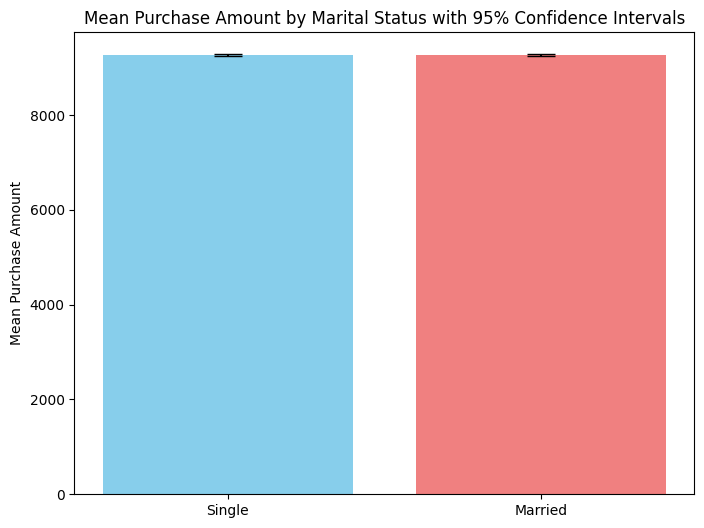

In [80]:
# Plot mean with confidence intervals
means = [single_pur_mean, married_pur_mean]
errors = [single_pur_mean - single_cl_left, married_pur_mean - married_cl_left]

plt.figure(figsize=(8, 6))
plt.bar(['Single', 'Married'], means, yerr=errors, capsize=10, color=['skyblue', 'lightcoral'])
plt.ylabel('Mean Purchase Amount')
plt.title('Mean Purchase Amount by Marital Status with 95% Confidence Intervals')
plt.show()

Are confidence intervals of average spending for single and married overlapping? How can Walmart leverage this conclusion to make changes or improvements?

**Observations**
1. From the above analysis, we can conclude that the confidence intervals for single and married overlap for the most part
2. Marital Status does not seem to be a factor in determining the purchase amounts


**Data Analysis 3**

1. Is there difference in spending for customers of different ages?

In [81]:
import numpy as np

#Get all Purchases from customers of different ages
customers_0_17 = df.loc[df['Age'] == '0-17']
customers_18_25 = df.loc[df['Age'] == '18-25']
customers_26_35 = df.loc[df['Age'] == '26-35']
customers_36_45 = df.loc[df['Age'] == '36-45']
customers_46_50 = df.loc[df['Age'] == '46-50']
customers_51_55 = df.loc[df['Age'] == '51-55']
customers_55plus = df.loc[df['Age'] == '55+']

customers_0_17_purchase_mean = np.mean(customers_0_17['Purchase'])
customers_18_25_purchase_mean = np.mean(customers_18_25['Purchase'])
customers_26_35_purchase_mean = np.mean(customers_26_35['Purchase'])
customers_36_45_purchase_mean = np.mean(customers_36_45['Purchase'])
customers_46_50_purchase_mean = np.mean(customers_46_50['Purchase'])
customers_51_55_purchase_mean = np.mean(customers_51_55['Purchase'])
customers_55plus_purchase_mean = np.mean(customers_55plus['Purchase'])
print("1. Customers aged 0-17 average spending per transaction: {}".format(round(customers_0_17_purchase_mean)))
print("2. Customers aged 18_25 average spending per transaction: {}".format(round(customers_18_25_purchase_mean)))
print("3. Customers aged 26_35 average spending per transaction: {}".format(round(customers_26_35_purchase_mean)))
print("4. Customers aged 36_45 average spending per transaction: {}".format(round(customers_36_45_purchase_mean)))
print("5. Customers aged 46_50 average spending per transaction: {}".format(round(customers_46_50_purchase_mean)))
print("6. Customers aged 51_55 average spending per transaction: {}".format(round(customers_51_55_purchase_mean)))
print("7. Customers aged 55plus average spending per transaction: {}".format(round(customers_55plus_purchase_mean)))

1. Customers aged 0-17 average spending per transaction: 8933
2. Customers aged 18_25 average spending per transaction: 9170
3. Customers aged 26_35 average spending per transaction: 9253
4. Customers aged 36_45 average spending per transaction: 9331
5. Customers aged 46_50 average spending per transaction: 9209
6. Customers aged 51_55 average spending per transaction: 9535
7. Customers aged 55plus average spending per transaction: 9336


**Observations**
1. Average spending by age follows a general pattern of younger customers spending less and older customers spending more
2. The pattern is increasing till age 36-45 when unusually customers aged 46-50 spend less. This needs to be checked with other analysis to deternmine if the drop is statistically significant
3. Customers aged 51-55 spend the most with average transaction value of 9535. It could be that as people are closer to retirement age, they have a lot more disposable income to spend on
4. Customers aged 0-17 spend the least - 8933. This correlates with the understanding that this age group does not generally have spending power


**Distribution of mean of expenses - Different Age Groups**

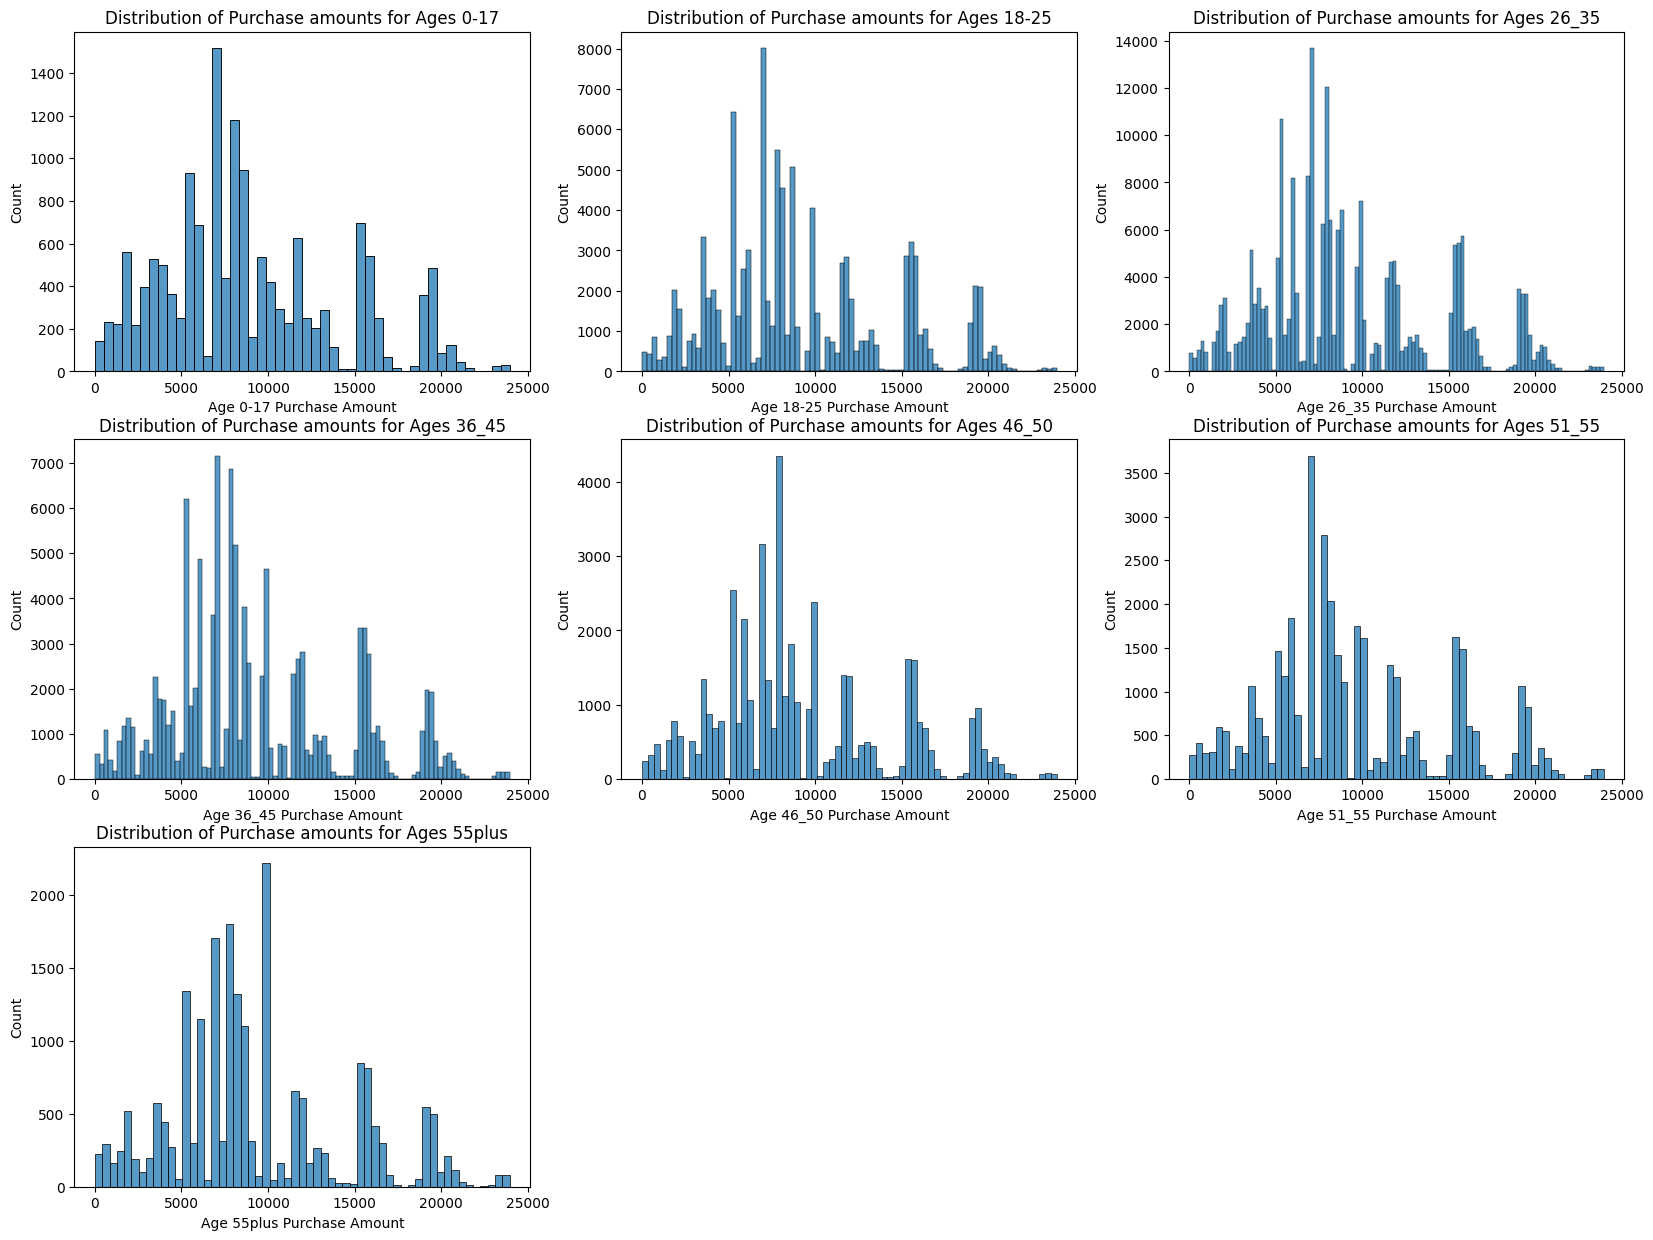

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.histplot(customers_0_17['Purchase']).set(title="Distribution of Purchase amounts for Ages 0-17", xlabel='Age 0-17 Purchase Amount', ylabel='Count')

plt.subplot(3,3,2)
sns.histplot(customers_18_25['Purchase']).set(title="Distribution of Purchase amounts for Ages 18-25", xlabel='Age 18-25 Purchase Amount', ylabel='Count')

plt.subplot(3,3,3)
sns.histplot(customers_26_35['Purchase']).set(title="Distribution of Purchase amounts for Ages 26_35", xlabel='Age 26_35 Purchase Amount', ylabel='Count')

plt.subplot(3,3,4)
sns.histplot(customers_36_45['Purchase']).set(title="Distribution of Purchase amounts for Ages 36_45", xlabel='Age 36_45 Purchase Amount', ylabel='Count')

plt.subplot(3,3,5)
sns.histplot(customers_46_50['Purchase']).set(title="Distribution of Purchase amounts for Ages 46_50", xlabel='Age 46_50 Purchase Amount', ylabel='Count')

plt.subplot(3,3,6)
sns.histplot(customers_51_55['Purchase']).set(title="Distribution of Purchase amounts for Ages 51_55", xlabel='Age 51_55 Purchase Amount', ylabel='Count')

plt.subplot(3,3,7)
sns.histplot(customers_55plus['Purchase']).set(title="Distribution of Purchase amounts for Ages 55plus", xlabel='Age 55plus Purchase Amount', ylabel='Count')
plt.show()

Let's visualize the distribution using the kernel density estimate(KDE) plot. The distribution will be overlapped to help us understand the distribution for different purchase amounts

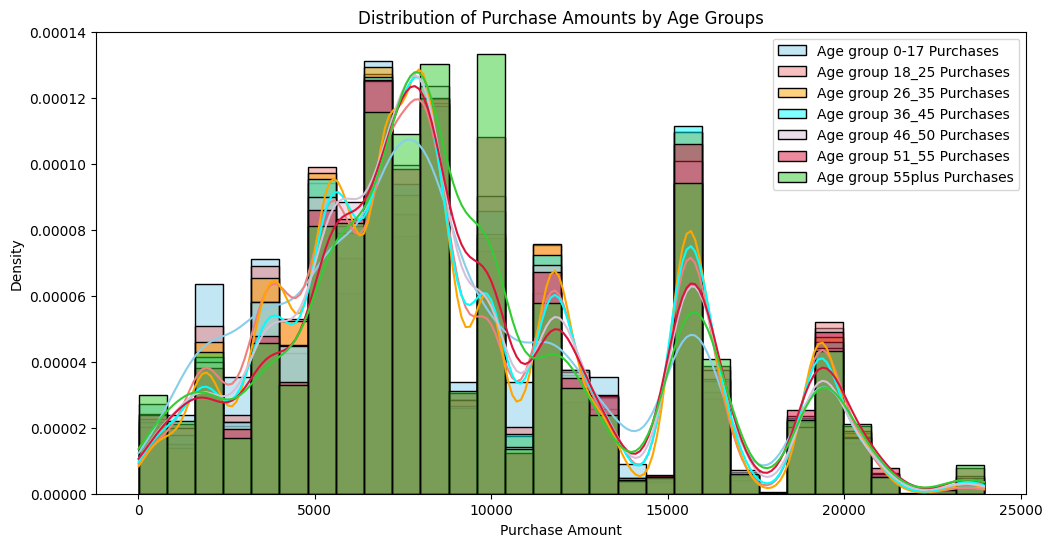

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms and KDE for purchase distributions of different age groups
plt.figure(figsize=(12, 6))

# Plot Age group 0-17 purchases
sns.histplot(customers_0_17['Purchase'], kde=True, color='skyblue', label='Age group 0-17 Purchases', stat='density', bins=30)

# Plot Age group 18_25 purchases
sns.histplot(customers_18_25['Purchase'], kde=True, color='lightcoral', label='Age group 18_25 Purchases', stat='density', bins=30)

# Plot Age group 26_35 purchases
sns.histplot(customers_26_35['Purchase'], kde=True, color='orange', label='Age group 26_35 Purchases', stat='density', bins=30)

# Plot Age group 36_45 purchases
sns.histplot(customers_36_45['Purchase'], kde=True, color='aqua', label='Age group 36_45 Purchases', stat='density', bins=30)

# Plot Age group 46_50 purchases
sns.histplot(customers_46_50['Purchase'], kde=True, color='thistle', label='Age group 46_50 Purchases', stat='density', bins=30)

# Plot Age group 51_55 purchases
sns.histplot(customers_51_55['Purchase'], kde=True, color='crimson', label='Age group 51_55 Purchases', stat='density', bins=30)

# Plot Age group 55plus purchases
sns.histplot(customers_55plus['Purchase'], kde=True, color='limegreen', label='Age group 55plus Purchases', stat='density', bins=30)

plt.title('Distribution of Purchase Amounts by Age Groups')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

**Confidence Intervals**

The purchase amounts distribution across different age groups follow normal distribution. Let's use this finding to compute the confidence interval with significance level of 0.05 and confidence level of 0.95

In [84]:
import numpy as np
import math
from scipy.stats import norm

customers_0_17_pur_mean = np.mean(customers_0_17['Purchase'])
customers_0_17_pur_std = np.std(customers_0_17['Purchase'])
customers_0_17_se = customers_0_17_pur_std/math.sqrt(len(customers_0_17))
customers_0_17_cl_left = norm.ppf(0.025) * customers_0_17_se + customers_0_17_pur_mean
customers_0_17_cl_right = norm.ppf(0.975) * customers_0_17_se + customers_0_17_pur_mean
print("With 95% confidence, customers_0_17 spending lies in the range of {} to {}".format(round(customers_0_17_cl_left,2), round(customers_0_17_cl_right,2)))

customers_18_25_pur_mean = np.mean(customers_18_25['Purchase'])
customers_18_25_pur_std = np.std(customers_18_25['Purchase'])
customers_18_25_se = customers_18_25_pur_std/math.sqrt(len(customers_18_25))
customers_18_25_cl_left = norm.ppf(0.025) * customers_18_25_se + customers_18_25_pur_mean
customers_18_25_cl_right = norm.ppf(0.975) * customers_18_25_se + customers_18_25_pur_mean
print("With 95% confidence, customers_18_25 spending lies in the range of {} to {}".format(round(customers_18_25_cl_left,2), round(customers_18_25_cl_right,2)))

customers_26_35_pur_mean = np.mean(customers_26_35['Purchase'])
customers_26_35_pur_std = np.std(customers_26_35['Purchase'])
customers_26_35_se = customers_26_35_pur_std/math.sqrt(len(customers_26_35))
customers_26_35_cl_left = norm.ppf(0.025) * customers_26_35_se + customers_26_35_pur_mean
customers_26_35_cl_right = norm.ppf(0.975) * customers_26_35_se + customers_26_35_pur_mean
print("With 95% confidence, customers_26_35 spending lies in the range of {} to {}".format(round(customers_26_35_cl_left,2), round(customers_26_35_cl_right,2)))

customers_36_45_pur_mean = np.mean(customers_36_45['Purchase'])
customers_36_45_pur_std = np.std(customers_36_45['Purchase'])
customers_36_45_se = customers_36_45_pur_std/math.sqrt(len(customers_36_45))
customers_36_45_cl_left = norm.ppf(0.025) * customers_36_45_se + customers_36_45_pur_mean
customers_36_45_cl_right = norm.ppf(0.975) * customers_36_45_se + customers_36_45_pur_mean
print("With 95% confidence, customers_36_45 spending lies in the range of {} to {}".format(round(customers_36_45_cl_left,2), round(customers_36_45_cl_right,2)))

customers_46_50_pur_mean = np.mean(customers_46_50['Purchase'])
customers_46_50_pur_std = np.std(customers_46_50['Purchase'])
customers_46_50_se = customers_46_50_pur_std/math.sqrt(len(customers_46_50))
customers_46_50_cl_left = norm.ppf(0.025) * customers_46_50_se + customers_46_50_pur_mean
customers_46_50_cl_right = norm.ppf(0.975) * customers_46_50_se + customers_46_50_pur_mean
print("With 95% confidence, customers_46_50 spending lies in the range of {} to {}".format(round(customers_46_50_cl_left,2), round(customers_46_50_cl_right,2)))

customers_51_55_pur_mean = np.mean(customers_51_55['Purchase'])
customers_51_55_pur_std = np.std(customers_51_55['Purchase'])
customers_51_55_se = customers_51_55_pur_std/math.sqrt(len(customers_51_55))
customers_51_55_cl_left = norm.ppf(0.025) * customers_51_55_se + customers_51_55_pur_mean
customers_51_55_cl_right = norm.ppf(0.975) * customers_51_55_se + customers_51_55_pur_mean
print("With 95% confidence, customers_51_55 spending lies in the range of {} to {}".format(round(customers_51_55_cl_left,2), round(customers_51_55_cl_right,2)))

customers_55plus_pur_mean = np.mean(customers_55plus['Purchase'])
customers_55plus_pur_std = np.std(customers_55plus['Purchase'])
customers_55plus_se = customers_55plus_pur_std/math.sqrt(len(customers_55plus))
customers_55plus_cl_left = norm.ppf(0.025) * customers_55plus_se + customers_55plus_pur_mean
customers_55plus_cl_right = norm.ppf(0.975) * customers_55plus_se + customers_55plus_pur_mean
print("With 95% confidence, customers_55plus spending lies in the range of {} to {}".format(round(customers_55plus_cl_left,2), round(customers_55plus_cl_right,2)))

With 95% confidence, customers_0_17 spending lies in the range of 8851.95 to 9014.98
With 95% confidence, customers_18_25 spending lies in the range of 9138.41 to 9200.92
With 95% confidence, customers_26_35 spending lies in the range of 9231.73 to 9273.65
With 95% confidence, customers_36_45 spending lies in the range of 9301.67 to 9361.03
With 95% confidence, customers_46_50 spending lies in the range of 9163.09 to 9254.17
With 95% confidence, customers_51_55 spending lies in the range of 9483.99 to 9585.62
With 95% confidence, customers_55plus spending lies in the range of 9269.3 to 9403.26


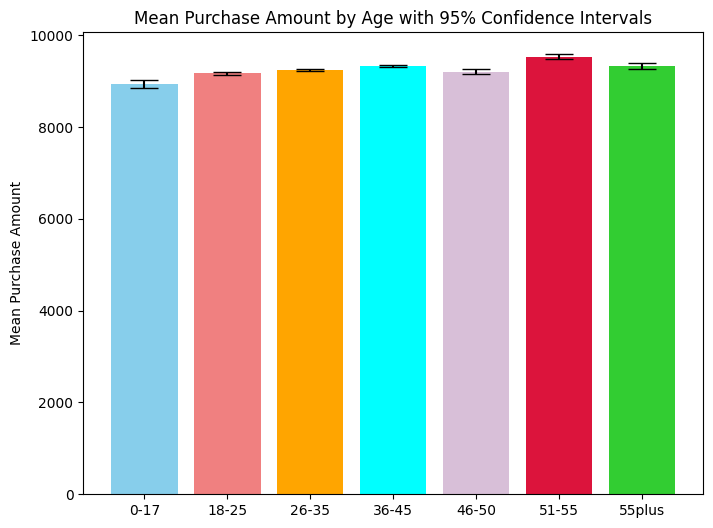

In [85]:
# Plot mean with confidence intervals
means = [customers_0_17_pur_mean, customers_18_25_pur_mean, customers_26_35_pur_mean, customers_36_45_pur_mean, customers_46_50_pur_mean, customers_51_55_pur_mean, customers_55plus_pur_mean]
errors = [customers_0_17_pur_mean - customers_0_17_cl_left,
          customers_18_25_pur_mean - customers_18_25_cl_left,
          customers_26_35_pur_mean - customers_26_35_cl_left,
          customers_36_45_pur_mean - customers_36_45_cl_left,
          customers_46_50_pur_mean - customers_46_50_cl_left,
          customers_51_55_pur_mean - customers_51_55_cl_left,
          customers_55plus_pur_mean - customers_55plus_cl_left
          ]

plt.figure(figsize=(8, 6))
plt.bar(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55plus'], means, yerr=errors, capsize=10, color=['skyblue', 'lightcoral', 'orange', 'aqua', 'thistle', 'crimson', 'limegreen'])
plt.ylabel('Mean Purchase Amount')
plt.title('Mean Purchase Amount by Age with 95% Confidence Intervals')
plt.show()

Are confidence intervals of average spending for different age groups overlapping? How can Walmart leverage this conclusion to make changes or improvements?

**Observations**
1. The confidence intervals for different age groups mostly don't overlap. This indicates a distinct spending pattern for each age group
2. It's observed that customers of age 50-55 spend more on average than all other age groups. Given the spending power, the products most bought by this age group should be identified to see if they can be replaced with products of higher margins
3. There is a dip in spending for age group 46 - 50. Could this be due to customers becoming more budget conscious? If yes, we should run promotions/discounts for products targeting this category
4. Also, it looks like teenage shoppers(0-17) spend the least. As they are just coming of age, there might be frictions related to using credit cards / memberships. To improve sales in this category, walmart should consider introducing kid friendly membership programs. Also, review the prices of products liked by this age group to see if price adjustments can be made
5. Spending again dips for age group 55 plus. This is expected as customers would have reached retirement and became conscious over their purchases. But, look into opportunities to make the shop elder friendly and train the staff to handle this particular group of people. For example, training the staff to be patient for elderly, improving cash reserve as most elderly are not comfortable using cards etc


**Recommendations**
1. An overwhelming amount of purchases(75.3%) were from Male customers. Generally Black Friday sales includes items that traditionally appeal more to men such as electronics, home improvement tools or gaming products. To attract more women shoppers, walmart should considering expanding the portfolio to include products that attract women. Consider providing exclusive discounts on these products for women
2. Customers with occupation 12, 15 and 17 spend more on average than other occupations. This indicates they have more disposable income. Study further on these customers and identify the products they are interested in to improve on sales.
3. Customers from City C spend more on average when compared to City A or City B. Adjust the products and the pricing in walmart shops across City C to reflect the increased tolerance for higher purchase price
4. Product category 10 is the most expensive. Among the customers buying from this category, 51 to 55 age group buys the top of the line products in this category. Identify those niche category of products. Marketing can be aligned to target these products with the specific age group(51 to 55).
5. Since Male customers spend more, Walmart can target Males with marketing campaigns for products with higher value.
6. For female customers, looks like the instinct is to spend less. These customers should be targeted with discounts, vouchers and special sale days.Also, we identifed the purchase ranges where women spent more on average than men. The provides opportunity to target these products specifically for women and as a consequence improve the average sales for women.
7. Marital Status does not seem to be a factor in determining the purchase amounts. Consider omitting this data field in future surveys if its not required for any other analysis
8. Customers aged 51-55 spend the most with average transaction value of 9535. It could be that as people are closer to retirement age, they have a lot more disposable income to spend on. Consider this finding for future inventory decisions
9. It looks like teenage shoppers(0-17) spend the least. As they are just coming of age, there might be frictions related to using credit cards / memberships. To improve sales in this category, walmart should consider introducing kid friendly membership programs. Also, review the prices of products liked by this age group to see if price adjustments can be made.

